In [2]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [3]:
# import the dataset
df = pd.read_csv("day.csv")

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# check for missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
df1=df.drop(['casual','registered','instant'],axis=1)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


In [8]:
# Drop the dteday column as all the details are captured by other columns
df1=df1.drop(["dteday"],axis=1)

In [9]:
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Data Preprocessing

In [10]:
# mapping the season columns
df1["season"]=df1["season"].map({1:"Spring",2:"Summer",3:"Autumn",4:"Winter"})

In [11]:
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
df1.rename(columns={'yr': 'year', 'mnth': 'month','hum':'humidity','cnt':'count'}, inplace=True)

In [13]:
# Convert the year from binary to actual years
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 68.6+ KB


In [14]:
# convert the year's values from binary to actual year
df1["year"]=df1["year"].map({0:"2018",1:"2019"})

In [15]:
# convert the months's values from numeric to actual months
df1["month"]=df1["month"].map({1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"})

In [16]:
# convert the holiday's value to yes or No
df1["holiday"]=df1["holiday"].map ({0:"No",1:"Yes"})

In [17]:
# convert the weekday's value to actual weekday
df1["weekday"]=df1["weekday"].map({1:"Wednesday",2:"Thursday",3:"Friday",4:"Saturday",5:"Sunday",6:"Monday",0:"Tuesday"})

In [18]:
# convert the workingday's value to yes or No
df1["workingday"]=df1["workingday"].map ({0:"No",1:"Yes"})

In [19]:
# Convert the weathersit'values from numeric to actual value
df1["weathersit"]=df1["weathersit"].map({1:"Clear clouds",2:"Mist+cloudy",3:"Light Rain",4:"Heavy Rains"})

In [20]:
df1.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,Spring,2018,January,No,Monday,No,Mist+cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,January,No,Tuesday,No,Mist+cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,January,No,Wednesday,Yes,Clear clouds,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,January,No,Thursday,Yes,Clear clouds,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,January,No,Friday,Yes,Clear clouds,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    object 
 2   month       730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


### Data Visualization

#### Ploting the categorical independent variables varies across the dependent variable. Boxplot is used to analyze and also can identify the outliers

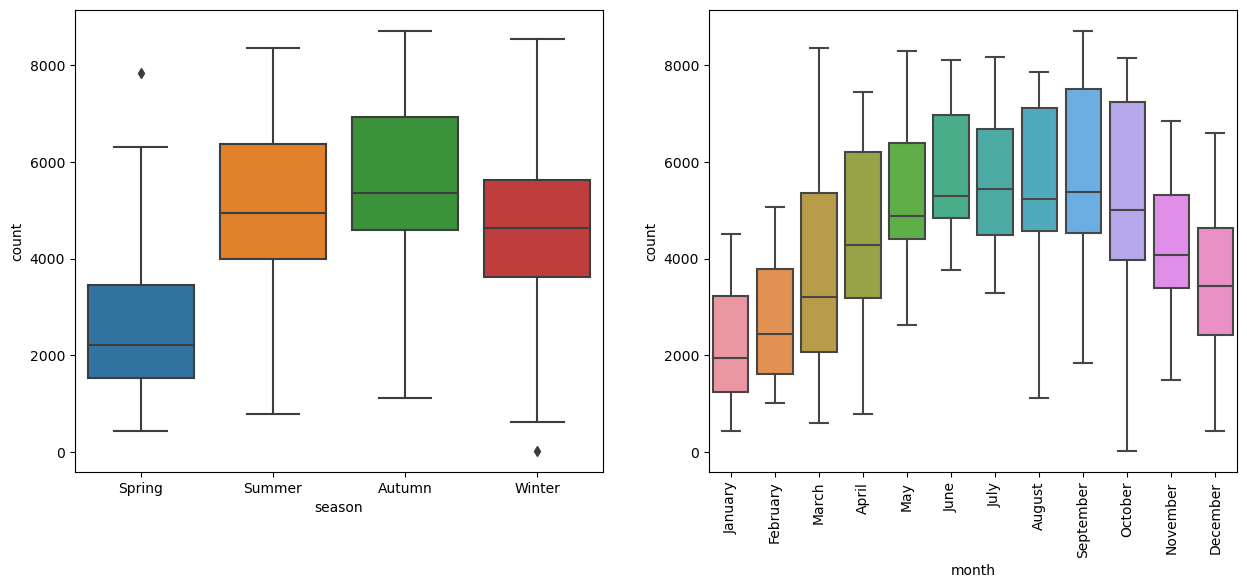

In [22]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.boxplot(x = 'season', y = 'count', data = df1)
plt.subplot(1,2,2)
sns.boxplot(x = 'month', y = 'count', data = df1)
plt.xticks(rotation=90)
plt.show()

#### Initial Findings
Among seasons, Autumn tend to have high demand, whereas spring has low demand (on considering the Average values)
Among months, high demand is from july to september

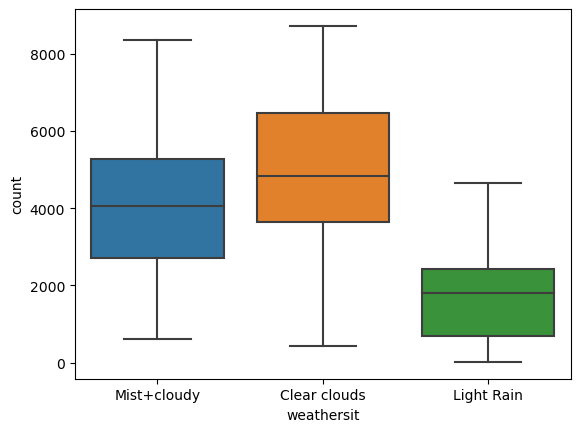

In [23]:
sns.boxplot(x = 'weathersit', y = 'count', data = df1)
plt.show()

Among various weather conditions, it is obvious that clear clouds have high demand and Light Rain have low demand

<Axes: xlabel='year', ylabel='count'>

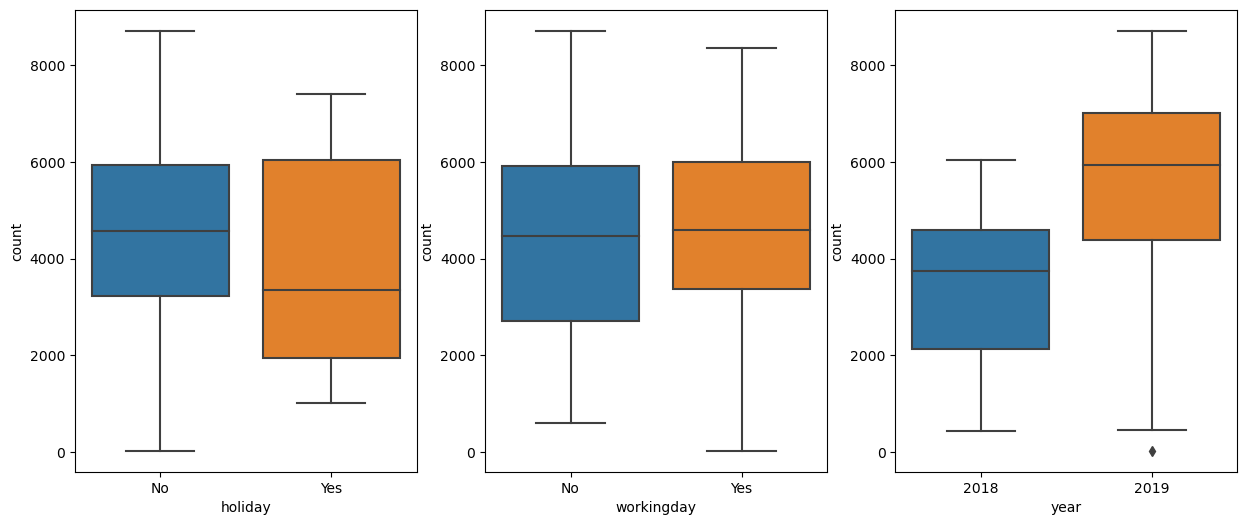

In [24]:
plt.figure(figsize=(15, 6))
plt.subplot(1,3,1)
sns.boxplot(x = 'holiday', y = 'count', data = df1)
plt.subplot(1,3,2)
sns.boxplot(x = 'workingday', y = 'count', data = df1)
plt.subplot(1,3,3)
sns.boxplot(x = 'year', y = 'count', data = df1)

Holidays tend to have less demand than than the working day

Working days have higher demand than than the weekends

Demand in 2019 is higher than 2018.

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


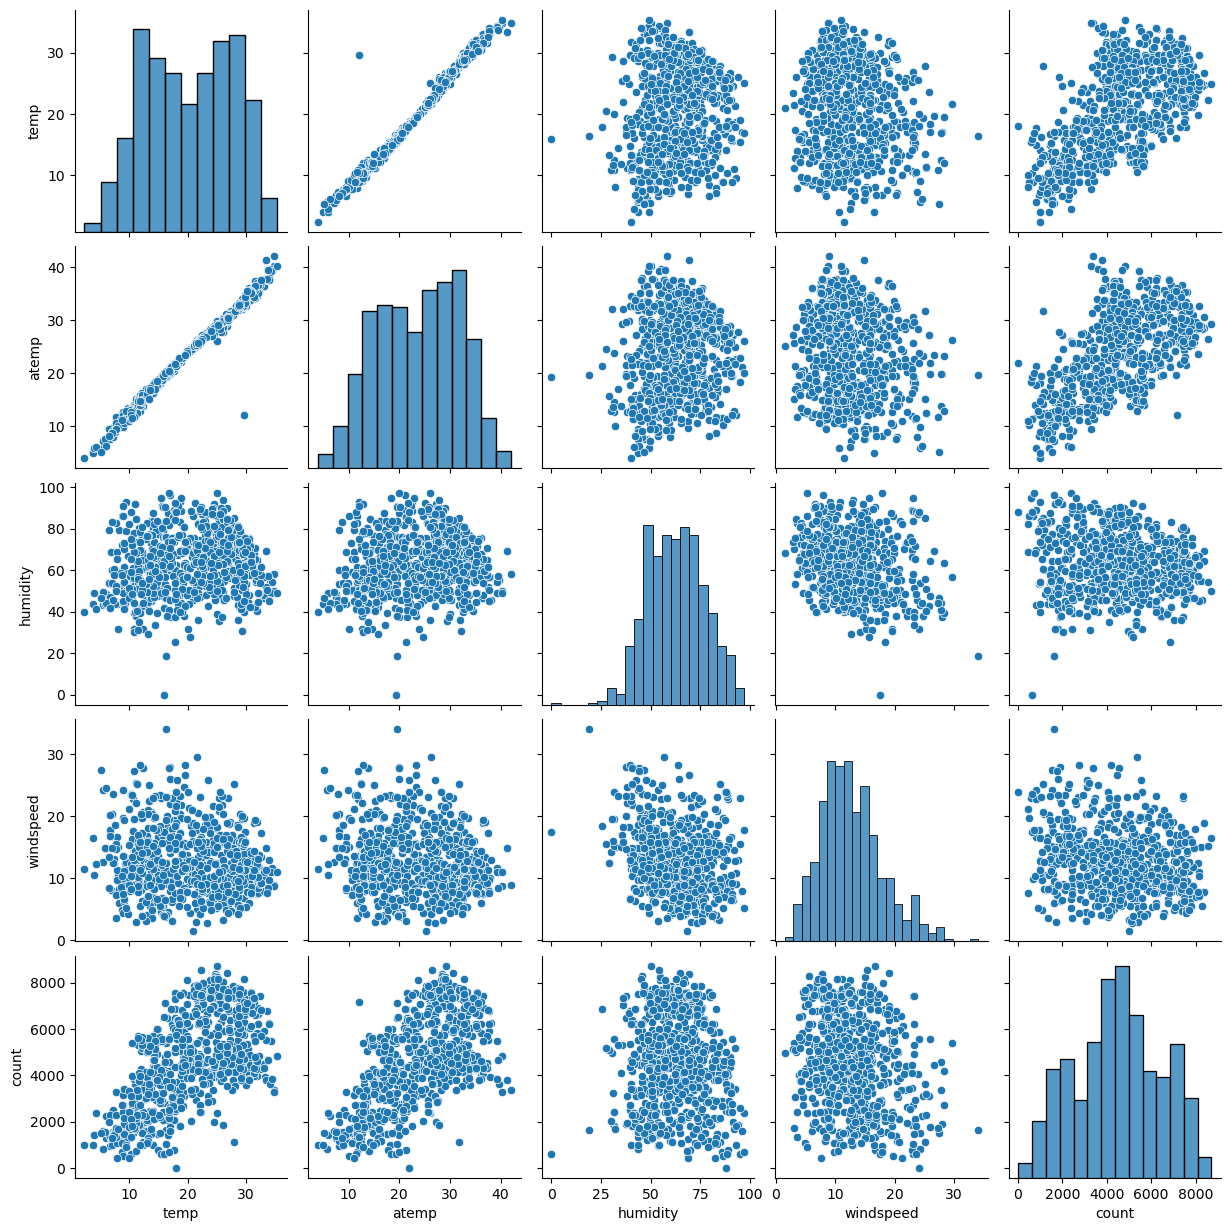

In [25]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=df1,vars=['temp','atemp','humidity','windspeed','count'])
plt.show()

Initial Observations:
    
    a) Temp and atemp are highly corelated
    
    b) Temp and atemp are partially corelated with total count
    
    c) Windspeed and humidity are not highly corelated with the total count
    

In [26]:
# Create dummy variables for categorical varaibles
dummy1 = pd.get_dummies(df1[['season', 'year', 'month', 'holiday','weekday','workingday','weathersit']], drop_first=True,dtype="float")

In [27]:
dummy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   season_Spring           730 non-null    float64
 1   season_Summer           730 non-null    float64
 2   season_Winter           730 non-null    float64
 3   year_2019               730 non-null    float64
 4   month_August            730 non-null    float64
 5   month_December          730 non-null    float64
 6   month_February          730 non-null    float64
 7   month_January           730 non-null    float64
 8   month_July              730 non-null    float64
 9   month_June              730 non-null    float64
 10  month_March             730 non-null    float64
 11  month_May               730 non-null    float64
 12  month_November          730 non-null    float64
 13  month_October           730 non-null    float64
 14  month_September         730 non-null    fl

In [28]:
# Adding the results to the master dataframe
df1 = pd.concat([df1, dummy1], axis=1)

In [29]:
# We have created dummies for the below variables, so we can drop them
df1 = df1.drop(['season', 'year', 'month', 'holiday','weekday','workingday','weathersit'], axis=1)

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temp                    730 non-null    float64
 1   atemp                   730 non-null    float64
 2   humidity                730 non-null    float64
 3   windspeed               730 non-null    float64
 4   count                   730 non-null    int64  
 5   season_Spring           730 non-null    float64
 6   season_Summer           730 non-null    float64
 7   season_Winter           730 non-null    float64
 8   year_2019               730 non-null    float64
 9   month_August            730 non-null    float64
 10  month_December          730 non-null    float64
 11  month_February          730 non-null    float64
 12  month_January           730 non-null    float64
 13  month_July              730 non-null    float64
 14  month_June              730 non-null    fl

In [31]:
# Checking for outliers in the continuous variables
num_df1 = df1[['temp','atemp','humidity','windspeed','count']]

In [32]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_df1.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,temp,atemp,humidity,windspeed,count
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
90%,29.998347,33.908210,81.762500,19.833997,7293.800000
95%,31.520460,35.749975,86.868735,22.999988,7576.400000
99%,33.868050,38.941650,92.795857,27.380948,8163.810000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

#### Checking for Missing Values and Inputing Them

In [33]:
df1.isnull().sum()

temp                      0
atemp                     0
humidity                  0
windspeed                 0
count                     0
season_Spring             0
season_Summer             0
season_Winter             0
year_2019                 0
month_August              0
month_December            0
month_February            0
month_January             0
month_July                0
month_June                0
month_March               0
month_May                 0
month_November            0
month_October             0
month_September           0
holiday_Yes               0
weekday_Monday            0
weekday_Saturday          0
weekday_Sunday            0
weekday_Thursday          0
weekday_Tuesday           0
weekday_Wednesday         0
workingday_Yes            0
weathersit_Light Rain     0
weathersit_Mist+cloudy    0
dtype: int64

### Step 4: Model Development (train-test split) 

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# Split the dataset
np.random.seed(0)
df_train, df_test = train_test_split(df1, train_size = 0.7, random_state = 100)

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [37]:
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','count']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,temp,atemp,humidity,windspeed,count,season_Spring,season_Summer,season_Winter,year_2019,month_August,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Rain,weathersit_Mist+cloudy
576,0.815169,0.766351,0.725633,0.264686,0.827658,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
426,0.442393,0.438975,0.640189,0.255342,0.465255,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
728,0.245101,0.200348,0.498067,0.663106,0.204096,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
482,0.395666,0.391735,0.504508,0.188475,0.482973,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
111,0.345824,0.318819,0.751824,0.380981,0.191095,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [38]:
# split the dependent and independent variables
y_train = df_train.pop('count')
X_train = df_train

Building our model
This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [39]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [40]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)            # running RFE
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('year_2019', True, 1),
 ('month_August', False, 7),
 ('month_December', False, 3),
 ('month_February', False, 4),
 ('month_January', True, 1),
 ('month_July', True, 1),
 ('month_June', False, 13),
 ('month_March', False, 15),
 ('month_May', False, 6),
 ('month_November', False, 2),
 ('month_October', False, 12),
 ('month_September', True, 1),
 ('holiday_Yes', True, 1),
 ('weekday_Monday', True, 1),
 ('weekday_Saturday', False, 14),
 ('weekday_Sunday', False, 11),
 ('weekday_Thursday', False, 10),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 9),
 ('workingday_Yes', True, 1),
 ('weathersit_Light Rain', True, 1),
 ('weathersit_Mist+cloudy', True, 1)]

In [42]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['temp', 'humidity', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'year_2019', 'month_January', 'month_July',
       'month_September', 'holiday_Yes', 'weekday_Monday', 'workingday_Yes',
       'weathersit_Light Rain', 'weathersit_Mist+cloudy'],
      dtype='object')


In [43]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'month_August', 'month_December', 'month_February',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [44]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [45]:
# Adding a constant variable 
#import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [46]:
lm1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [47]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          4.22e-191
Time:                        22:07:26   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

p-value is high for January,before eliminating lets check the collinearity effect

In [48]:
X_train_rfe.columns

Index(['const', 'temp', 'humidity', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'year_2019', 'month_January',
       'month_July', 'month_September', 'holiday_Yes', 'weekday_Monday',
       'workingday_Yes', 'weathersit_Light Rain', 'weathersit_Mist+cloudy'],
      dtype='object')

In [49]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [50]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,humidity,29.37
0,temp,17.78
12,workingday_Yes,5.31
2,windspeed,4.73
3,season_Spring,4.53
5,season_Winter,3.46
4,season_Summer,2.85
14,weathersit_Mist+cloudy,2.29
6,year_2019,2.09
11,weekday_Monday,1.98


VIF of humidity is very high, better to drop humidity

In [51]:
X_train_rfe = X_train_rfe.drop(['humidity'], axis=1)

In [52]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [53]:
lm2 = sm.OLS(y_train,X_train_rfe).fit() 

In [54]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          1.60e-188
Time:                        22:07:47   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1737      0.031      5.520      0.000       0.112       0.235
temp                       0.4722      0.034     14.005      0.000       0.406       0.538
windspeed                 -0.1563      0.025     -6.286      0.000      -0.205      -0.107
season_Spring             -0.0599      0.021     -2.867      0.004      -0.101      -0.019
season_Summer              0.0445      0.015      2.967      0.003       0.015       0.074
season_Winter              0.0784      0.017      4.562      0.000       0.045       0.112
year_2019                  0.2345      0.008     29.009      0.000       0.219       0.250
month_January             -0.0392      0.018     -2.227      0.026      -0.074      -0.005
month_July                -0.0479      0.018     -2.614      0.009      -0.084      -0.012
month_September            0.0755      0.017      4.527      0.000       0.043       0.108
holiday_Yes               -0.0558      0.027     -2.042      0.042      -0.109      -0.002
weekday_Monday             0.0583      0.015      3.968      0.000       0.029       0.087
workingday_Yes             0.0464      0.012      3.966      0.000       0.023       0.069
weathersit_Light Rain     -0.2908      0.024    -11.977      0.000      -0.339      -0.243
weathersit_Mist+cloudy    -0.0813      0.009     -9.437      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p-values of all the variables are less than 0.05. Highest p-value is for a holiday with 0.042.
Let us look in to the collinearity effect

In [55]:
X_train_rfe.columns

Index(['const', 'temp', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'year_2019', 'month_January', 'month_July',
       'month_September', 'holiday_Yes', 'weekday_Monday', 'workingday_Yes',
       'weathersit_Light Rain', 'weathersit_Mist+cloudy'],
      dtype='object')

In [56]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [57]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,7.07
11,workingday_Yes,5.24
1,windspeed,4.68
2,season_Spring,3.07
3,season_Summer,2.34
5,year_2019,2.08
4,season_Winter,1.98
10,weekday_Monday,1.97
6,month_January,1.62
7,month_July,1.59


Temp have very high VIF but very low p-value. So, let us eliminate the higher p-value

In [58]:
X_train_rfe = X_train_rfe.drop(['holiday_Yes'], axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe).fit() 
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          8.68e-189
Time:                        22:08:05   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [59]:
X_train_rfe.columns

Index(['const', 'temp', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'year_2019', 'month_January', 'month_July',
       'month_September', 'weekday_Monday', 'workingday_Yes',
       'weathersit_Light Rain', 'weathersit_Mist+cloudy'],
      dtype='object')

In [60]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [61]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.82
10,workingday_Yes,4.68
1,windspeed,4.66
2,season_Spring,2.99
3,season_Summer,2.33
5,year_2019,2.08
4,season_Winter,1.91
9,weekday_Monday,1.84
6,month_January,1.62
7,month_July,1.59


Considering vif and p-values let us drop monthJanauary, p-value is 0.025

In [62]:
X_train_rfe.columns

Index(['temp', 'windspeed', 'season_Spring', 'season_Summer', 'season_Winter',
       'year_2019', 'month_January', 'month_July', 'month_September',
       'weekday_Monday', 'workingday_Yes', 'weathersit_Light Rain',
       'weathersit_Mist+cloudy'],
      dtype='object')

In [63]:
X_train_rfe = X_train_rfe.drop(['month_January'], axis=1)

In [64]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe).fit() 
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          7.12e-189
Time:                        22:08:25   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

p-values are very less. So,let us check with multi collinearity

In [65]:
X_train_rfe.columns

Index(['const', 'temp', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'year_2019', 'month_July', 'month_September',
       'weekday_Monday', 'workingday_Yes', 'weathersit_Light Rain',
       'weathersit_Mist+cloudy'],
      dtype='object')

In [66]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [67]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.73
9,workingday_Yes,4.66
1,windspeed,4.64
2,season_Spring,2.38
3,season_Summer,2.32
5,year_2019,2.07
4,season_Winter,1.91
8,weekday_Monday,1.83
6,month_July,1.58
11,weathersit_Mist+cloudy,1.57


In [68]:
X_train_rfe = X_train_rfe.drop(['temp'], axis=1)

In [69]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe).fit() 
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     149.4
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          6.65e-150
Time:                        22:08:33   Log-Likelihood:                 410.88
No. Observations:                 510   AIC:                            -797.8
Df Residuals:                     498   BIC:                            -746.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [70]:
X_train_rfe = X_train_rfe.drop(['month_July'], axis=1)

In [71]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train,X_train_rfe).fit() 
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     164.6
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          5.49e-151
Time:                        22:08:40   Log-Likelihood:                 410.80
No. Observations:                 510   AIC:                            -799.6
Df Residuals:                     499   BIC:                            -753.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [72]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [73]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,windspeed,4.00
7,workingday_Yes,3.29
1,season_Spring,2.00
2,season_Summer,2.00
4,year_2019,1.88
3,season_Winter,1.73
6,weekday_Monday,1.56
9,weathersit_Mist+cloudy,1.56
5,month_September,1.18
8,weathersit_Light Rain,1.08


#### lm_7 model have low VIF values (Collinear effects are less)
#### lm_7 have very good Adj R-squared - 0.763
#### lm_7 model have low p-values (All variables are significant)
#### lm_7 model have high F-statistic (>1) and Prob of F is very low. So, this model is itself significant
#### Considering above parameters, this model is finalized for further evaluation

## Residual Analysis on  train data

In [74]:
# Prediction of y-train
X_train_rfe = sm.add_constant(X_train_rfe)
y_train_pred = lm7.predict(X_train_rfe)

C:\Users\user\AppData\Local\Temp\ipykernel_3120\2708353275.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k, bins = 20)


Text(0.5, 0, 'Errors')

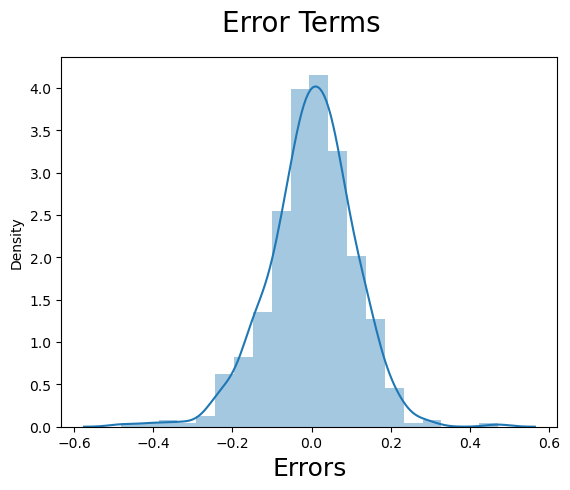

In [75]:
# Plot the histogram of the error terms
k= (y_train - y_train_pred)
fig = plt.figure()
sns.distplot(k, bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

 The above plot conveys that Residuals follow Normality

#### Linearity

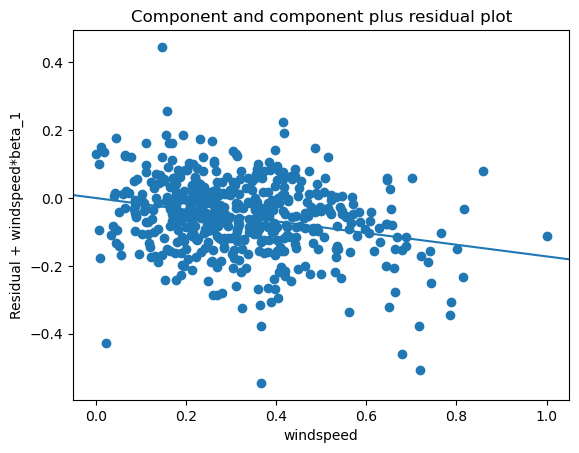

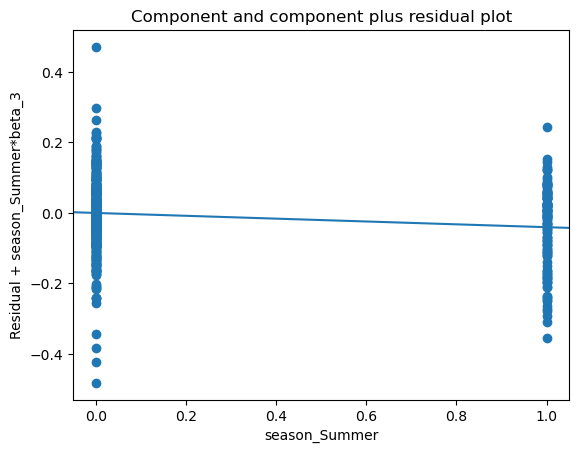

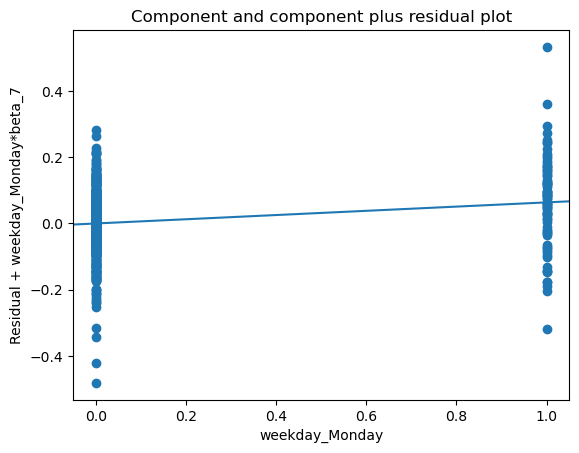

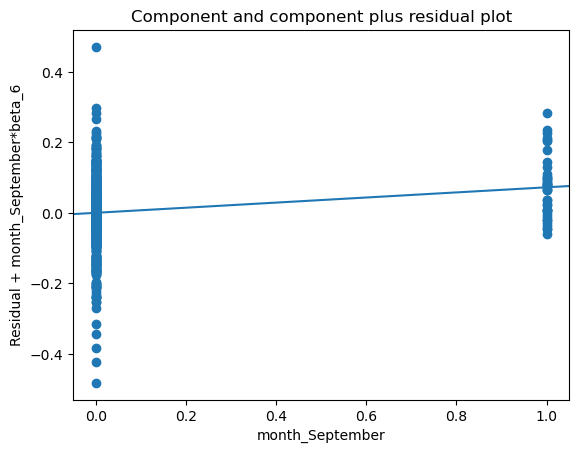

In [76]:
# Linear relationship validation using CCPR plot


sm.graphics.plot_ccpr(lm7, 'windspeed')
plt.show()

sm.graphics.plot_ccpr(lm7, 'season_Summer')
plt.show()

sm.graphics.plot_ccpr(lm7, 'weekday_Monday')
plt.show()

sm.graphics.plot_ccpr(lm7, 'month_September')
plt.show()

The above plots conveys te linear effects

### Homodescadicity

In [77]:
y_train_pred = lm7.predict(X_train_rfe)
residual = y_train.values - y_train_pred


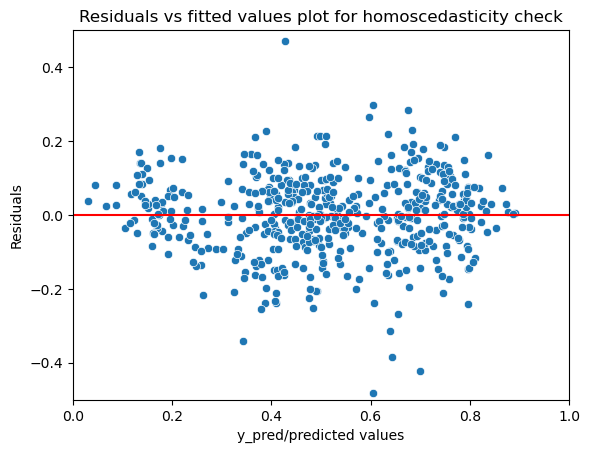

In [78]:
p = sns.scatterplot(x=y_train_pred,y=residual)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.5,0.5)
plt.xlim(0,1)
p = sns.lineplot(x=y_train, y=y_train - y_train, color='r')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

There are no patterns appear in the above plot for Residuals

### Predicting and Evaluating on test data set

In [79]:
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','count']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,temp,atemp,humidity,windspeed,count,season_Spring,season_Summer,season_Winter,year_2019,month_August,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Rain,weathersit_Mist+cloudy
184,0.831783,0.769660,0.657364,0.084219,0.692706,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
535,0.901354,0.842587,0.610133,0.153728,0.712034,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
299,0.511964,0.496145,0.837699,0.334206,0.303382,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
221,0.881625,0.795343,0.437098,0.339570,0.547400,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
152,0.817246,0.741471,0.314298,0.537414,0.569029,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [80]:
y_test = df_test.pop('count')
X_test = df_test# Plotting y_test and y_pred to understand the spread



In [81]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [82]:
col1=X_train_rfe.columns

In [83]:
X_test_final = X_test_m4[col1]

In [84]:
y_pred = lm7.predict(X_test_final)

In [85]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7512

Coefficients are as follows 

In [86]:
round(lm7.params,4)

const                     0.5299
windspeed                -0.1721
season_Spring            -0.2969
season_Summer            -0.0403
season_Winter            -0.0744
year_2019                 0.2475
month_September           0.0723
weekday_Monday            0.0638
workingday_Yes            0.0563
weathersit_Light Rain    -0.3001
weathersit_Mist+cloudy   -0.0907
dtype: float64

Equation for the model is:

count = 0.5299 -0.1721*windspeed -0.2969*Spring-0.403*Summer -0.0744*Winter +0.2475*year_2019 + 0.0723*September + 0.0638*Monday+0.0563*Workingday_yes -0.3001*LightRain -0.0907*Misty

In [87]:
# Calculating Adjusted-R^2 value for the test dataset
r2

0.7512328527170702

In [88]:
n= X_test_final.shape
n

(220, 11)

Adj r-squared = 1 -((1-r2)*(n-1)) / (n-k-1)
n= number of data points = 220
k = number of independent vaiables = 10

In [89]:
1 -((1-r2)*(219/209))
                
                     

0.7393301183973128

### Comparison of R-squared values. 

R-Squared for train dataset : 0.767
R-Squared for test dataset  : 0.751

Adjusted R-squared for train dataset:0.763
Adjusted R-squared for test dataset:0.739

The values of train and test do not differ and these independent variables around 75% of varance in the dependent variable
It is good model



### Variables influencing the bike demand

#### The varibles significantly influencing the demand for the bikes are windspeed,spring,summer, Winter, 2019, September, Monday, Workingday,Light Rain and Misty.